# Ordinary Differential Equations

Chapter 8 of the texbook.

In this module we will develop numerical methods for solving ***the initial value problem (IVP) for ordinary differential equations (ODEs)***

$$
    \frac{d}{dt} {\bf y}(t) = {\bf f}({\bf y}(t), t), \qquad
    {\bf y}(t_0) = {\bf y}_0.
$$

### Example: A harmonic oscillator 
$$
    \frac{d^2}{dt^2} x(t) = -\omega^2 x(t), \qquad x(0)=1, \qquad \frac{d}{dt} x(0) = 0.
$$
The exact solution $x(t) = \cos(\omega t)$.

We can re-write the problem as
$$
    y_1 = x, \\
	\frac{d y_1}{dt} = y_2, \\
	\frac{d y_2}{dt} = \frac{d^2 x}{dt^2} = -\omega^2 x = -\omega^2 y_1.
$$

$$
    {\bf y}(t) = \left( y_1(t) \atop y_2(t) \right) = \left( x(t) \atop \quad \frac{dx(t)}{dt} \right)  \\
    \frac{d}{dt} { \bf y}(t) = \left( \frac{d y_1}{dt} \atop \frac{d y_2}{dt} \right) = \left( y_2 \atop -\omega^2 y_1 \right) 
$$

The initial condition
$$
    {\bf y}(0) = \left( x(0) \atop \quad \frac{dx(0)}{dt} \right) = \left(1 \atop 0\right).
$$

## Numerical methods for solving the IVP for ODEs:

* Explicit
* Implicit
* Predictor-corrector
* Geometric integrator
* Adaptive step size

## Explicit Euler's method

Using the forward finite difference (see Module 1), we obtain
$$
	\frac{d}{dt} {\bf y}(t) = {\bf f}({\bf y}(t), t)
	\Longrightarrow
	\frac{{\bf y}(t + \Delta t) - {\bf y}(t)}{\Delta t} + O(\Delta t)
	= {\bf f}({\bf y}(t), t) \\
	{\bf y}(t + \Delta t) = {\bf y}(t) + {\bf f}({\bf y}(t), t) \Delta t + O(\Delta t^2).
$$ 

We finally rewrite the formula as
$$
    {\bf y}_{k + 1} = {\bf y}_k + {\bf f}({\bf y}_k, t_k) \Delta t + O(\Delta t^2), \qquad
    k=1,2, \ldots,
$$
where the time lattice $t_k = (k -1) \Delta t$, ${\bf y}_k = {\bf y}(t_k)$. Note that ${\bf y}_1$ is the given initial condition.

In [1]:
function explicit_euler(𝐟::Function, 𝐲₀::Vector, T_final::Real, N::Int)
    
    # initialization
    𝐲 = zeros(length(𝐲₀), N + 1)
    
    # time range
    t = range(0, T_final, N + 1)
    Δt = t[2] - t[1]
    
    𝐲[:, 1] = 𝐲₀
    
    for k = 1:N
        𝐲[:, k + 1] = 𝐲[:, k] + 𝐟(𝐲[:, k], t[k]) * Δt
    end

    return t, 𝐲
end

explicit_euler (generic function with 1 method)

In [5]:
@time begin

expl_euler_t, expl_euler_𝐲 = explicit_euler(
    # function 𝐟 decleared as an in-line function
    (y, t) -> [y[2]; -y[1]],
    
    # 𝐲₀
    [1; 0],
    
    # T_final
    4 * π,
    
    # N
    100,
);
    
end;

  0.027711 seconds (49.32 k allocations: 2.357 MiB, 99.63% compilation time)


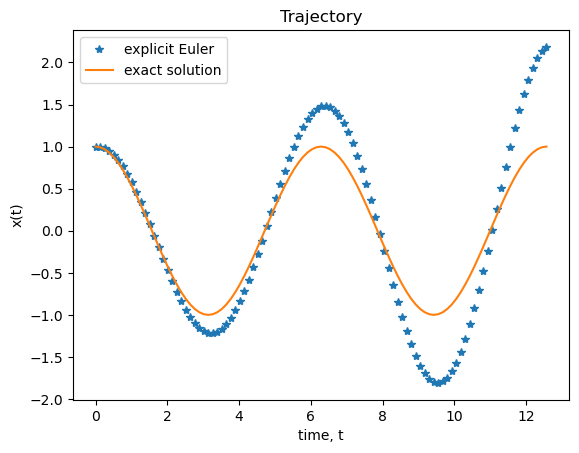

In [7]:
using PyPlot

title("Trajectory")
plot(expl_euler_t, expl_euler_𝐲[1, :], "*", label="explicit Euler")
plot(expl_euler_t, cos.(expl_euler_t), label="exact solution")
xlabel("time, t")
ylabel("x(t)")
legend()
show()

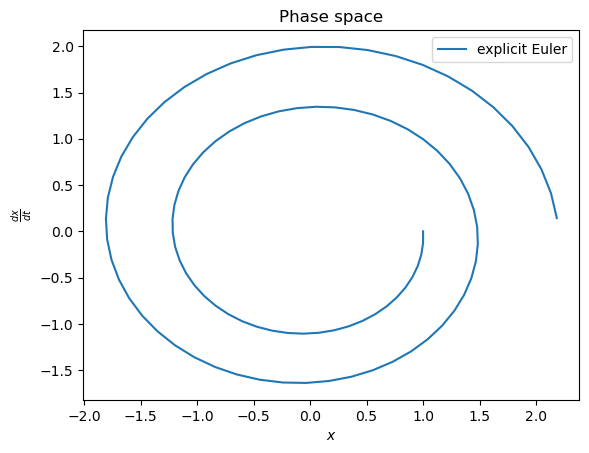

In [8]:
title("Phase space")
plot(expl_euler_𝐲[1, :], expl_euler_𝐲[2, :], label="explicit Euler")
xlabel(L"x")
ylabel(L"\frac{dx}{dt}")
legend()
show()

## Explicit Runge–Kutta methods

$$
    \frac{d}{dt} {\bf y}(t) = {\bf f}({\bf y}(t), t) 
    \Longrightarrow \\
     {\bf y}(t + \Delta t) - {\bf y}(t) = \int_{t}^{t + \Delta t} {\bf f}({\bf y}(\tau), \tau) d\tau.
$$
The mid-point integration rule
$$
    \int_{t}^{t + \Delta t} g(\tau) d\tau = g\left( t + \frac{\Delta t}{2} \right)\Delta t + O(\Delta t^3)
$$
we get
$$
    {\bf y}(t + \Delta t) = {\bf y}(t) +  {\bf f}\left({\bf y}\left(t + \frac{\Delta t}{2}\right), t + \frac{\Delta t}{2} \right)\Delta t + O(\Delta t^3).
$$
The value of the function ${\bf y}\left(t + \frac{\Delta t}{2}\right)$ at the midpoint can be obtained by the Euler method 
$$
    {\bf y}\left(t + \frac{\Delta t}{2}\right) = {\bf y}(t) + {\bf f}({\bf y}(t), t) \frac{\Delta t}{2} + O(\Delta t^2).
$$

### RK2 

Second-order methods with two stages
$$
    {\bf y}(t + \Delta t) = {\bf y}(t) +  {\bf f}\left(
        {\bf y}(t) + {\bf f}({\bf y}(t), t) \frac{\Delta t}{2} , t + \frac{\Delta t}{2} 
    \right)\Delta t
$$
or on the time grind
$$
    {\bf y}_{k + 1} = {\bf y}_k + {\bf f}\left(
        {\bf y}_k + {\bf f}({\bf y}_k, t_k) \frac{\Delta t}{2} , t_k + \frac{\Delta t}{2}
    \right)\Delta t
$$

In [ ]:
₀